In [1]:
from sympy import *
init_printing()

In [2]:
import sympsi as spsi

In [3]:
import sympy
import numpy as np

In [4]:
from sympy.matrices.expressions.kronecker import matrix_kronecker_product as kr_prod

## Direct coupling

In [5]:
w1,w2,alpha1,alpha2 = symbols("omega_1,omega_2,alpha_1,alpha_2")
g=symbols("g")
dva=symbols("2")

In [41]:
an=Matrix([[0,1,0],[0,0,np.sqrt(2)],[0,0,0]])
cr=Matrix([[0,0,0],[1,0,0],[0,np.sqrt(2),0]])
a_q1=kr_prod(eye(3),an)
adag_q1=a_q1.T
a_q2=kr_prod(an,eye(3))
adag_q2=a_q2.T

In [49]:
diag=w1*adag_q1*a_q1+alpha1/2*adag_q1*adag_q1*a_q1*a_q1+w2*adag_q2*a_q2+alpha2/2*adag_q2*adag_q2*a_q2*a_q2

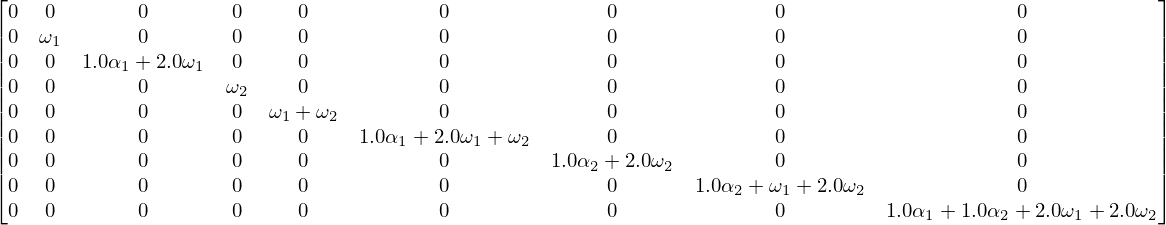

In [52]:
diag

In [53]:
coupling = g*(an_q1*cr_q2+an_q2*cr_q1)
coupling_nonrwa = g*(an_q1+cr_q1)*(an_q2+cr_q2)

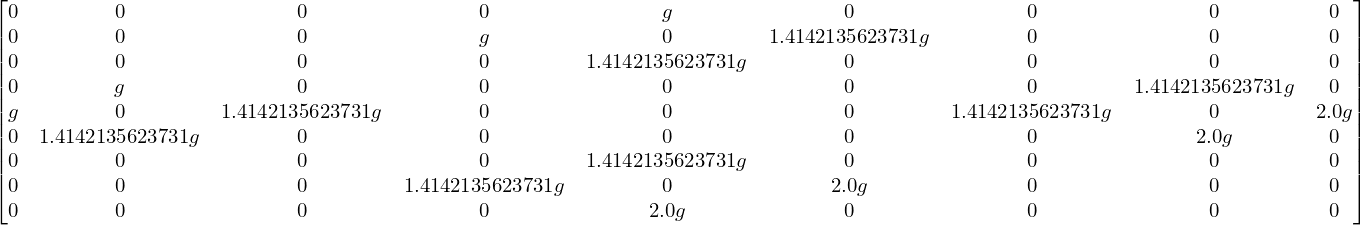

In [54]:
coupling_nonrwa

In [55]:
eigvals=sympy.simplify(diag.eigenvals())

In [56]:
eigvals

In [57]:
eigens = sympy.simplify(diag.eigenvects())

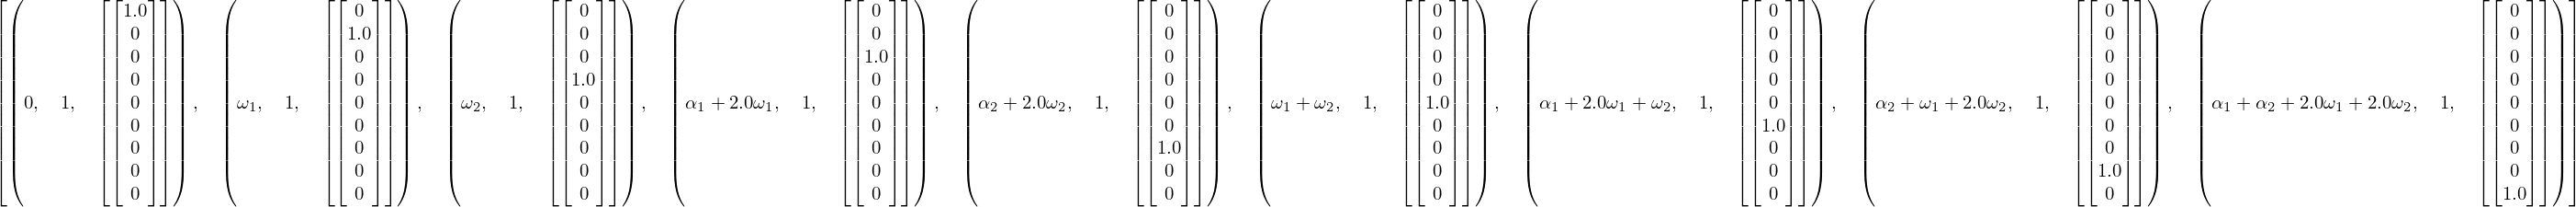

In [58]:
eigens

In [59]:
#first order
delta1=[]
for i in range(0,len(eigens)):
    delta1.append(sympy.simplify((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[i][-1]))))
delta1

In [75]:
#second order
delta2=[]
for i in range(0,len(eigens)):
    summa=[]
    for j in range(0,len(eigens)):
        if i!=j:
            value=sympy.simplify(((Matrix(eigens[j][-1])).T*coupling*(Matrix(eigens[i][-1])))**2)/(eigens[i][0]-
                                                                                                      eigens[j][0])
            summa.append(value[0])
    delta2.append(sum(summa))

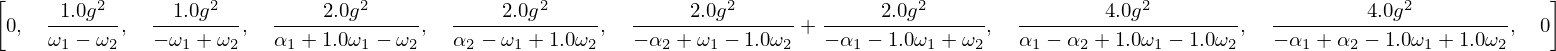

In [76]:
delta2

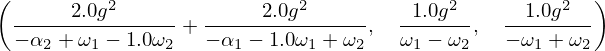

In [77]:
delta2[5],delta2[1],delta2[2]

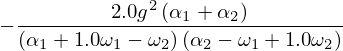

In [78]:
#RWA
zz_2order=sympy.simplify(delta2[5]-delta2[1]-delta2[2]+delta2[0])
zz_2order

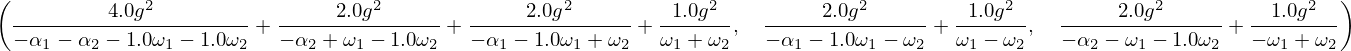

In [73]:
delta2[5],delta2[1],delta2[2]

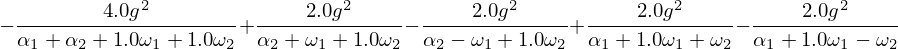

In [74]:
#Non RWA
zz_2order = sympy.simplify(delta2[5]-delta2[1]-delta2[2]+delta2[0])
zz_2order

## coupling via a cavity

In [5]:
w1,w2,wc,alpha1,alpha2,alphac = symbols("omega_1,omega_2,omega_c,alpha_1,alpha_2,alpha_c")
g1=symbols("g1c")
g2=symbols("g2c")

In [6]:
#qubit1, qubit2, coupler
an=Matrix([[0,1,0],[0,0,np.sqrt(2)],[0,0,0]])
cr=Matrix([[0,0,0],[1,0,0],[0,np.sqrt(2),0]])
a_q1=kr_prod(an,eye(3),eye(3))
adag_q1=a_q1.T
a_q2=kr_prod(eye(3),an,eye(3))
adag_q2=a_q2.T
a_c=kr_prod(eye(3),eye(3),an)
adag_c=a_c.T

In [7]:
diag=w1*adag_q1*a_q1+alpha1/2*adag_q1*adag_q1*a_q1*a_q1+w2*adag_q2*a_q2+alpha2/2*adag_q2*adag_q2*a_q2*a_q2+\
wc*adag_c*a_c+alphac/2*adag_c*adag_c*a_c*a_c

In [8]:
coupling_rwa = g1*(a_q1*adag_c+a_c*adag_q1)+g2*(a_q2*adag_c+a_c*adag_q2)
coupling_nonrwa = g1*(a_q1+adag_q1)*(a_c+adag_c)+g2*(a_q2+adag_q2)*(a_c+adag_c)

In [9]:
eigens = sympy.simplify(diag.eigenvects())

In [10]:
#first order
delta1=[]
for i in range(0,len(eigens)):
    delta1.append(sympy.simplify((Matrix(eigens[i][-1])).T*coupling_rwa*(Matrix(eigens[i][-1]))))
delta1

In [21]:
#second order
delta2=[]
for i in range(0,len(eigens)):
    summa=[]
    for j in range(0,len(eigens)):
        if i!=j:
            value=sympy.simplify(((Matrix(eigens[j][-1])).T*coupling_rwa*(Matrix(eigens[i][-1])))**2)/(eigens[i][0]-
                                                                                                      eigens[j][0])
            summa.append(value[0])
    delta2.append(sum(summa))

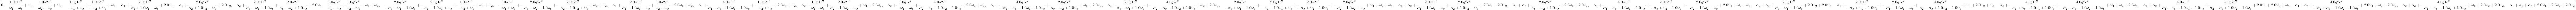

In [31]:
evals_second_order=[eigens[i][0]+delta2[i] for i in range(len(eigens))]
evals_second_order

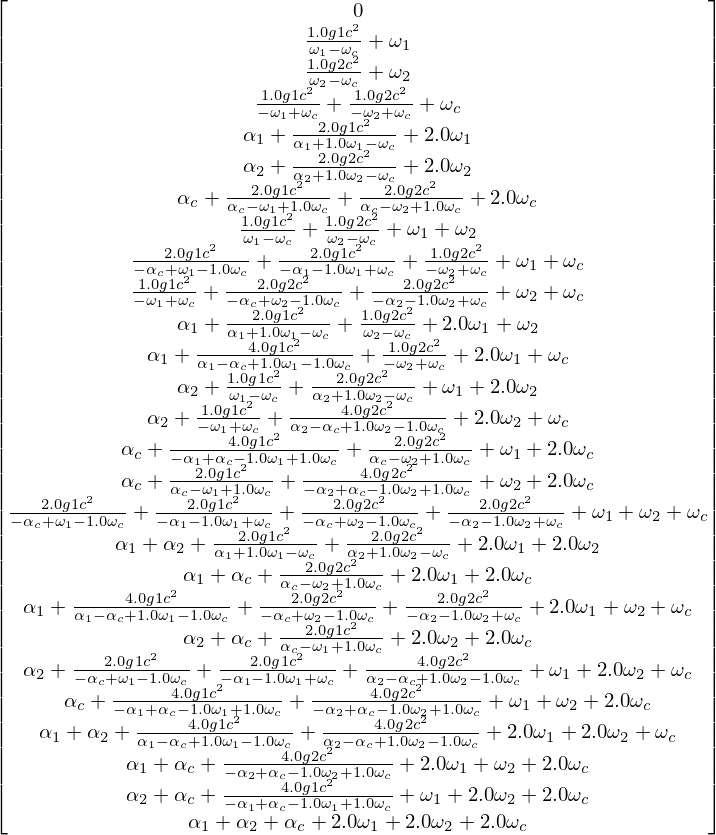

In [33]:
sympy.diag(evals_second_order)

In [41]:
from tqdm import tqdm
#third order, around 2 minutes
#
coupling=coupling_nonrwa
delta3=[]
for i in tqdm(range(0,len(eigens))):
    summa = []
    for j in range(0,len(eigens)):
        if i!=j:
            value=(((Matrix(eigens[j][-1])).T*coupling*(Matrix(eigens[i][-1])))/
            (eigens[i][0]-eigens[j][0]))**2
            summa.append(value[0])
    second_sum = (((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[i][-1])))*sum(summa))[0]
    summa = []
    for j in range(0,len(eigens)):
        if i!=j:
            for k in range(0,len(eigens)):
                if i!=k:
                    value=((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[j][-1])))*\
                    ((Matrix(eigens[j][-1])).T*coupling*(Matrix(eigens[k][-1])))*\
                    ((Matrix(eigens[k][-1])).T*coupling*(Matrix(eigens[i][-1])))/\
                    ((eigens[i][0]-eigens[j][0])*(eigens[i][0]-eigens[k][0]))
                    summa.append(value[0]) 
    first_sum = sum(summa)
    print(second_sum,first_sum)
    delta3.append(first_sum-second_sum)

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

0 0


  4%|███                                                                                | 1/27 [00:03<01:23,  3.20s/it]

0 0


  7%|██████▏                                                                            | 2/27 [00:06<01:21,  3.27s/it]

0 0


 11%|█████████▏                                                                         | 3/27 [00:09<01:18,  3.27s/it]

0 0


 15%|████████████▎                                                                      | 4/27 [00:13<01:20,  3.49s/it]

0 0


 19%|███████████████▎                                                                   | 5/27 [00:17<01:14,  3.40s/it]

0 0


 22%|██████████████████▍                                                                | 6/27 [00:20<01:10,  3.36s/it]

0 0


 26%|█████████████████████▌                                                             | 7/27 [00:23<01:06,  3.31s/it]

0 0


 30%|████████████████████████▌                                                          | 8/27 [00:26<01:02,  3.29s/it]

0 0


 33%|███████████████████████████▋                                                       | 9/27 [00:30<01:02,  3.47s/it]

0 0


 37%|██████████████████████████████▎                                                   | 10/27 [00:34<00:59,  3.51s/it]

0 0


 41%|█████████████████████████████████▍                                                | 11/27 [00:37<00:55,  3.48s/it]

0 0


 44%|████████████████████████████████████▍                                             | 12/27 [00:40<00:51,  3.42s/it]

0 0


 48%|███████████████████████████████████████▍                                          | 13/27 [00:44<00:50,  3.57s/it]

0 0


 52%|██████████████████████████████████████████▌                                       | 14/27 [00:48<00:45,  3.54s/it]

0 0


 56%|█████████████████████████████████████████████▌                                    | 15/27 [00:51<00:41,  3.43s/it]

0 0


 59%|████████████████████████████████████████████████▌                                 | 16/27 [00:54<00:37,  3.41s/it]

0 0


 63%|███████████████████████████████████████████████████▋                              | 17/27 [00:58<00:33,  3.40s/it]

0 0


 67%|██████████████████████████████████████████████████████▋                           | 18/27 [01:01<00:30,  3.39s/it]

0 0


 70%|█████████████████████████████████████████████████████████▋                        | 19/27 [01:04<00:26,  3.33s/it]

0 0


 74%|████████████████████████████████████████████████████████████▋                     | 20/27 [01:08<00:22,  3.29s/it]

0 0


 78%|███████████████████████████████████████████████████████████████▊                  | 21/27 [01:11<00:20,  3.35s/it]

0 0


 81%|██████████████████████████████████████████████████████████████████▊               | 22/27 [01:14<00:16,  3.32s/it]

0 0


 85%|█████████████████████████████████████████████████████████████████████▊            | 23/27 [01:17<00:13,  3.29s/it]

0 0


 89%|████████████████████████████████████████████████████████████████████████▉         | 24/27 [01:21<00:09,  3.26s/it]

0 0


 93%|███████████████████████████████████████████████████████████████████████████▉      | 25/27 [01:24<00:06,  3.26s/it]

0 0


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 26/27 [01:27<00:03,  3.23s/it]

0 0


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:30<00:00,  3.20s/it]


In [19]:
from tqdm import tqdm
#third order, around 2 minutes
#
coupling=coupling_rwa
delta4=[]
for i in tqdm([1,2,7]):
    summa = []
    for k2 in range(0,len(eigens)):
        if i!=k2:
            for k3 in range(0,len(eigens)):
                if i!=k3:
                    for k4 in range(0,len(eigens)):
                        if i!=k4:
                            value = ((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k4][-1])))*\
                            ((Matrix(eigens[k4][-1])).T*coupling*(Matrix(eigens[k3][-1])))*\
                            ((Matrix(eigens[k3][-1])).T*coupling*(Matrix(eigens[k2][-1])))*\
                            ((Matrix(eigens[k2][-1])).T*coupling*(Matrix(eigens[i][-1])))/\
                            ((eigens[i][0]-eigens[k2][0])*(eigens[i][0]-eigens[k3][0])*(eigens[i][0]-eigens[k4][0]))
                            summa.append(value[0]) 
    first_sum = sum(summa)
    summa = []
    for k4 in range(0,len(eigens)):
        if i!=k4:
            for k2 in range(0,len(eigens)):
                if i!=k2:
                    value = (((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k4][-1])))*\
                    ((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k2][-1]))))**2/\
                    (((eigens[i][0]-eigens[k4][0])**2)*(eigens[i][0]-eigens[k2][0]))
                    summa.append(value[0]) 
    second_sum = sum(summa)
    summa = []
    for k4 in range(0,len(eigens)):
        if i!=k4:
            for k3 in range(0,len(eigens)):
                if i!=k3:
                    value = ((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k4][-1])))*\
                    ((Matrix(eigens[k4][-1])).T*coupling*(Matrix(eigens[k3][-1])))*\
                    ((Matrix(eigens[k3][-1])).T*coupling*(Matrix(eigens[i][-1])))/\
                    (((eigens[i][0]-eigens[k3][0])**2)*(eigens[i][0]-eigens[k4][0]))
                    summa.append(value[0]) 
    third_sum = (((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[i][-1])))*sum(summa))[0]
    print(first_sum)
    summa = []
    for k4 in range(0,len(eigens)):
        if i!=k4:
            for k3 in range(0,len(eigens)):
                if i!=k3:
                    value = ((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k4][-1])))*\
                    ((Matrix(eigens[k4][-1])).T*coupling*(Matrix(eigens[k3][-1])))*\
                    ((Matrix(eigens[k3][-1])).T*coupling*(Matrix(eigens[i][-1])))/\
                    (((eigens[i][0]-eigens[k3][0])**2)*(eigens[i][0]-eigens[k4][0]))
                    summa.append(value[0]) 
    fourth_sum = (((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[i][-1])))*sum(summa))[0]
    
    summa = []
    for k4 in range(0,len(eigens)):
        if i!=k4:
            value = ((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[k4][-1])))**2/\
            ((eigens[i][0]-eigens[k4][0])**3)
            summa.append(value[0]) 
    fiveth_sum = ((((Matrix(eigens[i][-1])).T*coupling*(Matrix(eigens[i][-1])))**2)*sum(summa))[0]
    
    result=first_sum-second_sum-third_sum-fourth_sum+fiveth_sum
#     print(result)
    delta4.append(result)



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

1.0*g1c**2*g2c**2/((omega_1 - omega_2)*(omega_1 - omega_c)**2)




 33%|███████████████████████████▋                                                       | 1/3 [01:50<03:41, 110.50s/it]

1.0*g1c**2*g2c**2/((-omega_1 + omega_2)*(omega_2 - omega_c)**2)




 67%|███████████████████████████████████████████████████████▎                           | 2/3 [03:37<01:49, 109.47s/it]

2.0*g1c**2*g2c**2/((omega_2 - omega_c)**2*(-alpha_c + omega_1 + omega_2 - 2.0*omega_c)) + 2.0*g1c**2*g2c**2/((omega_2 - omega_c)**2*(-alpha_1 - 1.0*omega_1 + omega_2)) + 4.0*g1c**2*g2c**2/((omega_1 - omega_c)*(omega_2 - omega_c)*(-alpha_c + omega_1 + omega_2 - 2.0*omega_c)) + 2.0*g1c**2*g2c**2/((omega_1 - omega_c)**2*(-alpha_c + omega_1 + omega_2 - 2.0*omega_c)) + 2.0*g1c**2*g2c**2/((omega_1 - omega_c)**2*(-alpha_2 + omega_1 - 1.0*omega_2))




100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [05:26<00:00, 109.29s/it]

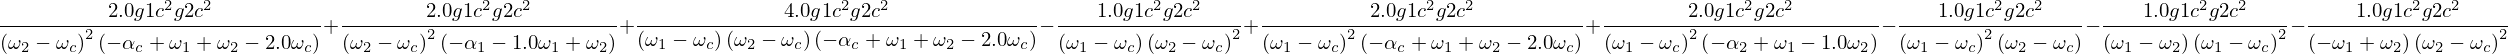

In [30]:
delta4[-1]-delta4[0]-delta4[1]

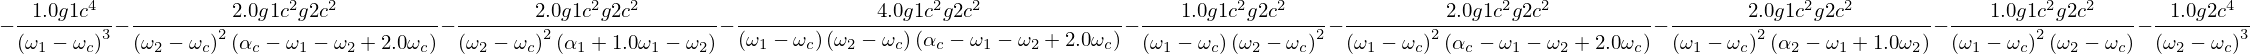

In [27]:
sympy.simplify(delta4[-1])

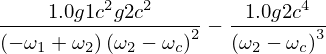

In [24]:
delta4[1]

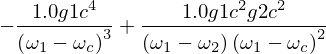

In [25]:
delta4[0]

In [17]:
delta4[2]